# Simulation Runner
This notebook runs Monte Carlo simulations using prepared strategies and shows comparison outputs.


In [8]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)

Project root added to sys.path: c:\Users\mateo\Desktop\MCEM\new\Nouveau dossier\Simulation_Project


In [9]:
import pickle
from monte_carlo_simulator import MonteCarloSimulator

In [10]:
# === General configuration ===
season = 2016
db_path = "../data/F1_timingdata_2014_2019.sqlite"
num_simulations = 2

# === List of GPs with associated strategy files ===
gp_configs = {
    "Austin": {
        "strategy_file": "strategies_austin_2016.pkl",
        "var_name": "simulator_austin"
    },
    "Suzuka": {
        "strategy_file": "strategies_suzuka_2016.pkl",
        "var_name": "simulator_suzuka"
    },
    "MexicoCity": {
        "strategy_file": "strategies_mexico_2016.pkl",
        "var_name": "simulator_mexico"
    },
    "YasMarina": {
        "strategy_file": "strategies_yasmarina_2016.pkl",
        "var_name": "simulator_yasmarina"
    }
}

 Running Monte Carlo simulation for: Austin


Output()


=== Wilcoxon Test for Lap Times ===

 Résultats du test de Wilcoxon:
Statistique de test : 27.0
P-value : 0.00059
 Rejet de H0 : Les temps simulés et réels diffèrent significativement.

=== Spearman Rank Correlation for Positions ===

 Résultats du test de corrélation de Spearman:
Coefficient de corrélation (rs) : 0.4761
P-value : 0.02510
 Rejet de H0 : Les positions simulées et réelles sont significativement corrélées.
Comparaison des résultats moyens issus des simulations Monte Carlo et des réels:
    driver_id  final_position_sim  cumulative_time_sim  final_position_actual  \
7           9                 1.5          5639.948928                      7   
19         30                 2.0          5606.060337                     13   
13         19                 3.5          5701.439445                     14   
3           4                 4.5          5706.947281                     12   
6           8                 4.5          5735.296668                     11   
1       

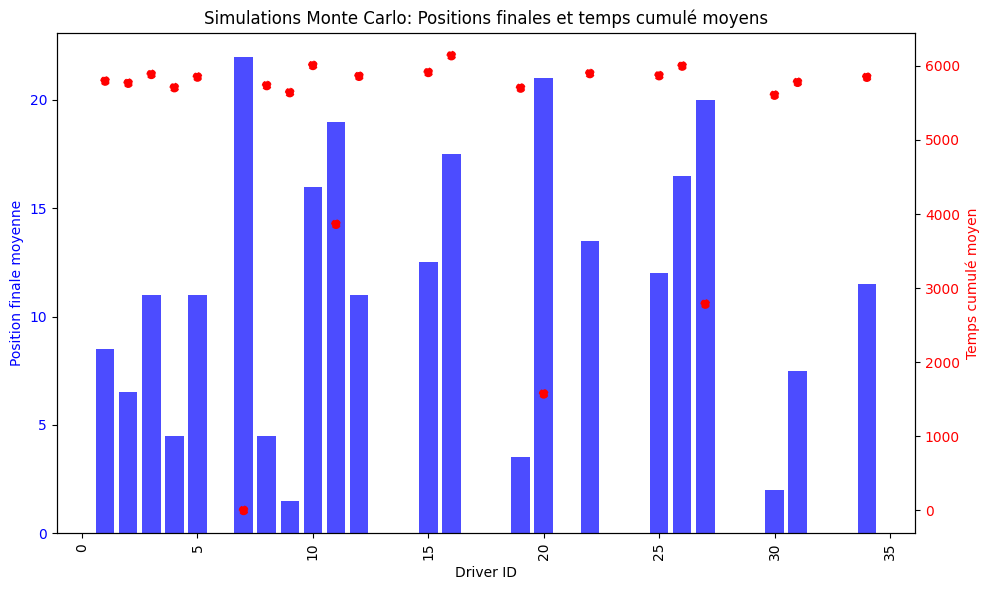

Monte Carlo simulation for Austin completed.
 Running Monte Carlo simulation for: Suzuka


Output()


=== Wilcoxon Test for Lap Times ===

 Résultats du test de Wilcoxon:
Statistique de test : 118.0
P-value : 0.79903
Non-rejet de H0 : Aucune différence significative entre les temps simulés et réels.

=== Spearman Rank Correlation for Positions ===

 Résultats du test de corrélation de Spearman:
Coefficient de corrélation (rs) : 0.1511
P-value : 0.50207
 Non-rejet de H0 : Aucune corrélation significative entre les positions simulées et réelles.
Comparaison des résultats moyens issus des simulations Monte Carlo et des réels:
    driver_id  final_position_sim  cumulative_time_sim  final_position_actual  \
7           9                 1.5          4954.612752                      9   
21         34                 4.5          5175.425137                     21   
9          11                 4.5          5186.394875                      5   
14         20                 5.0          5185.200864                     20   
10         12                 5.5          5194.121336           

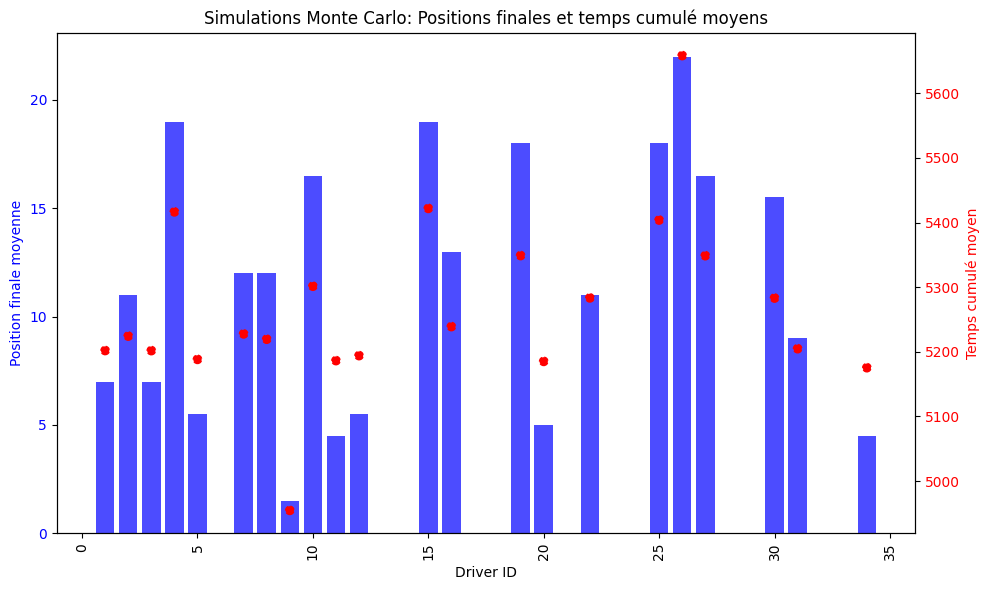

Monte Carlo simulation for Suzuka completed.
 Running Monte Carlo simulation for: MexicoCity


Output()


=== Wilcoxon Test for Lap Times ===

 Résultats du test de Wilcoxon:
Statistique de test : 79.0
P-value : 0.33172
Non-rejet de H0 : Aucune différence significative entre les temps simulés et réels.

=== Spearman Rank Correlation for Positions ===

 Résultats du test de corrélation de Spearman:
Coefficient de corrélation (rs) : 0.6476
P-value : 0.00150
 Rejet de H0 : Les positions simulées et réelles sont significativement corrélées.
Comparaison des résultats moyens issus des simulations Monte Carlo et des réels:
    driver_id  final_position_sim  cumulative_time_sim  final_position_actual  \
11         15                 1.0          5763.310657                      8   
2           3                 2.5          5990.816713                      2   
18         27                 3.5          6004.705038                      4   
3           4                 3.5          6021.883703                     17   
0           1                 4.5          6025.268176                      

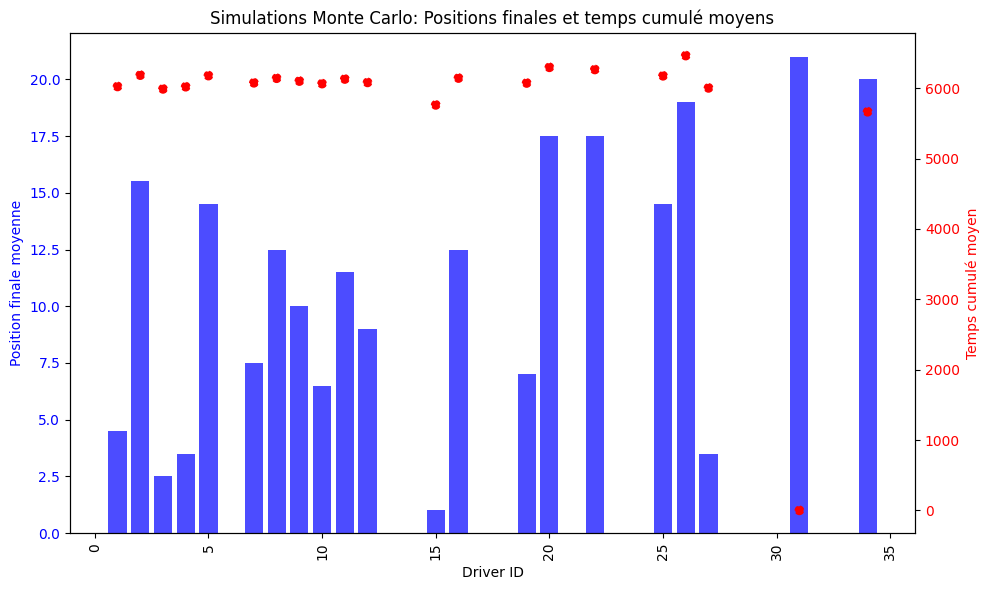

Monte Carlo simulation for MexicoCity completed.
 Running Monte Carlo simulation for: YasMarina


Output()


=== Wilcoxon Test for Lap Times ===

 Résultats du test de Wilcoxon:
Statistique de test : 85.0
P-value : 0.18698
Non-rejet de H0 : Aucune différence significative entre les temps simulés et réels.

=== Spearman Rank Correlation for Positions ===

 Résultats du test de corrélation de Spearman:
Coefficient de corrélation (rs) : 0.5113
P-value : 0.01501
 Rejet de H0 : Les positions simulées et réelles sont significativement corrélées.
Comparaison des résultats moyens issus des simulations Monte Carlo et des réels:
    driver_id  final_position_sim  cumulative_time_sim  final_position_actual  \
10         12                 2.5          5748.232957                      3   
7           9                 2.5          5757.208653                      9   
20         31                 2.5          5775.660114                     14   
13         19                 5.5          5805.438993                     15   
19         30                 6.5          5822.551227                     1

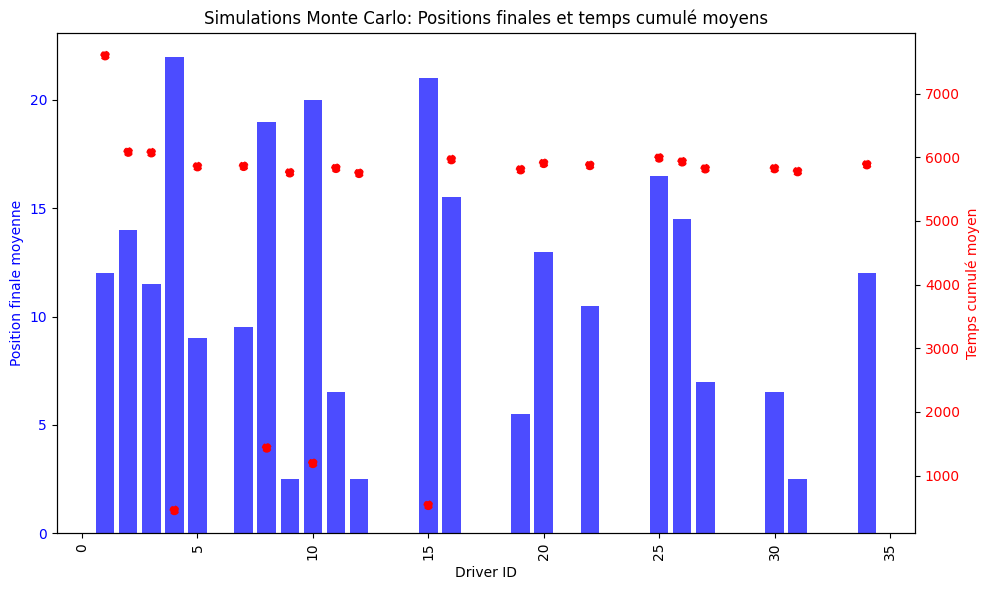

Monte Carlo simulation for YasMarina completed.


In [11]:
# === Dictionary to store simulators by name ===
simulators = {}

# === Loop through each GP ===
for gp_name, cfg in gp_configs.items():
    print("=" * 60)
    print(f" Running Monte Carlo simulation for: {gp_name}")

    # Load strategy
    with open(f"../data/{cfg['strategy_file']}", "rb") as f:
        driver_strategies = pickle.load(f)

    # Create simulator
    sim = MonteCarloSimulator(
        season=season,
        gp_location=gp_name,
        db_path=db_path,
        driver_strategies=driver_strategies,
        num_simulations=num_simulations,
        test=True
    )

    sim.run_simulation()
    sim.summarize()

    # Store simulator with dynamic name (and in dict)
    globals()[cfg["var_name"]] = sim
    simulators[cfg["var_name"]] = sim

    print(f"Monte Carlo simulation for {gp_name} completed.")
    print("=" * 60)



 Running Monte Carlo simulation for: Austin


Output()


=== Wilcoxon Test for Lap Times ===

 Résultats du test de Wilcoxon:
Statistique de test : 42.0
P-value : 0.00468
 Rejet de H0 : Les temps simulés et réels diffèrent significativement.

=== Spearman Rank Correlation for Positions ===

 Résultats du test de corrélation de Spearman:
Coefficient de corrélation (rs) : 0.5870
P-value : 0.00408
 Rejet de H0 : Les positions simulées et réelles sont significativement corrélées.
Comparaison des résultats moyens issus des simulations Monte Carlo et des réels:
    driver_id  final_position_sim  cumulative_time_sim  final_position_actual  \
19         30                 1.0          5586.024288                     13   
6           8                 3.0          5747.625712                     11   
7           9                 4.0          5716.909881                      7   
0           1                 5.0          5763.234644                      1   
1           2                 5.5          5766.366724                      3   
2       

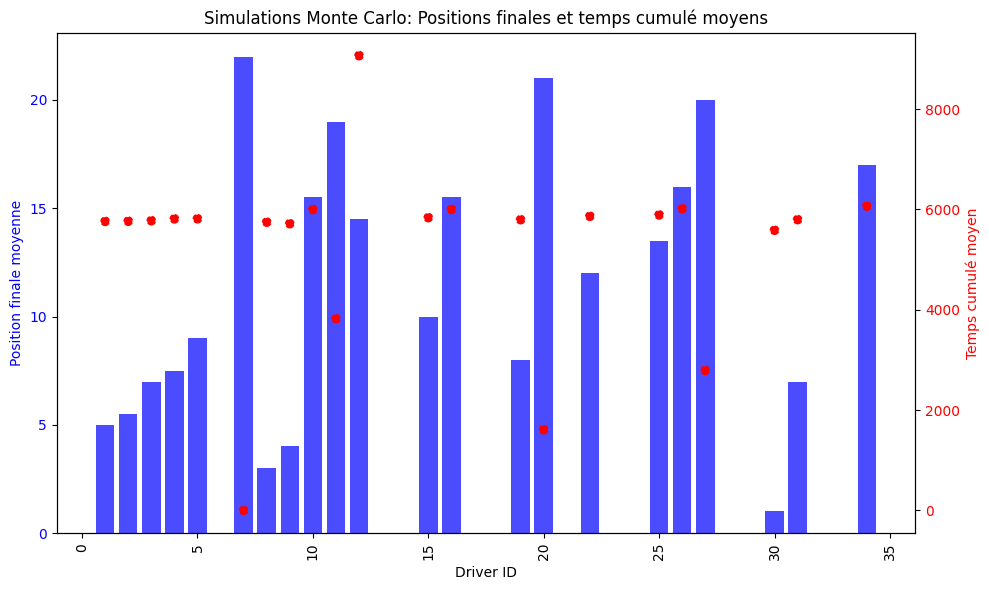

Monte Carlo simulation for Austin completed.


In [12]:
# === Dictionnaire pour stocker les simulateurs par nom ===
simulators = {}

# === Choisir un seul GP à simuler ===
gp_name = "Austin"  # Change ce nom si tu veux simuler un autre GP
cfg = gp_configs[gp_name]

print("=" * 60)
print(f" Running Monte Carlo simulation for: {gp_name}")

# Charger la stratégie des pilotes
with open(f"../data/{cfg['strategy_file']}", "rb") as f:
    driver_strategies = pickle.load(f)

# Créer le simulateur
sim = MonteCarloSimulator(
    season=season,
    gp_location=gp_name,
    db_path=db_path,
    driver_strategies=driver_strategies,
    num_simulations=num_simulations,
    test=True
)

# Lancer la simulation et résumer les résultats
sim.run_simulation()
sim.summarize()

# Stocker le simulateur
globals()[cfg["var_name"]] = sim
simulators[cfg["var_name"]] = sim

print(f"Monte Carlo simulation for {gp_name} completed.")
print("=" * 60)
